In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('banknotes.csv')

In [3]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [6]:
x = df[['Variance','Skewness','Curtosis','Entropy']]
y = df['Class']

In [7]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [8]:
np.unique(y)

array([0, 1], dtype=int64)

In [9]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

In [34]:
x.corrwith(y)

Variance   -0.724843
Skewness   -0.444688
Curtosis    0.155883
Entropy    -0.023424
dtype: float64

<Axes: xlabel='Class', ylabel='count'>

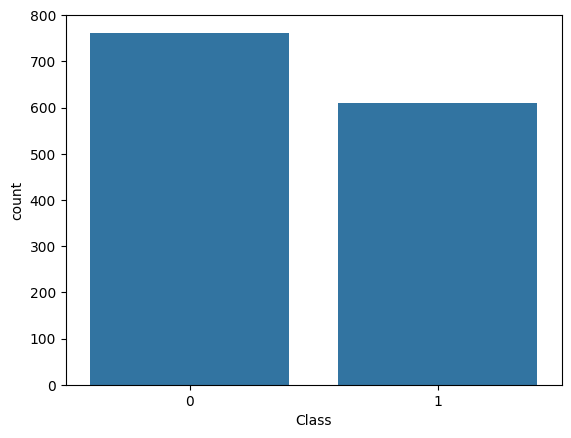

In [10]:
sns.countplot(x=y)

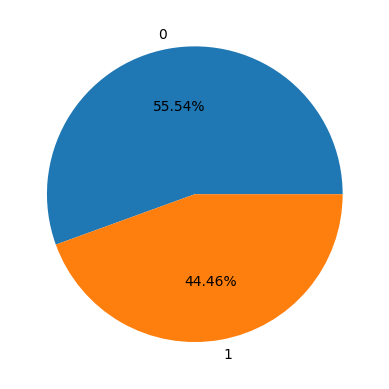

In [11]:
plt.pie(y.value_counts(), labels=y.value_counts().index,autopct='%2.2f%%');

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1029, 4), (343, 4), (1029,), (343,))

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
tree = DecisionTreeClassifier(random_state=0)

In [17]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
y_pred = tree.predict(x_test)

In [20]:
accuracy_score(y_test,y_pred)

0.9795918367346939

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

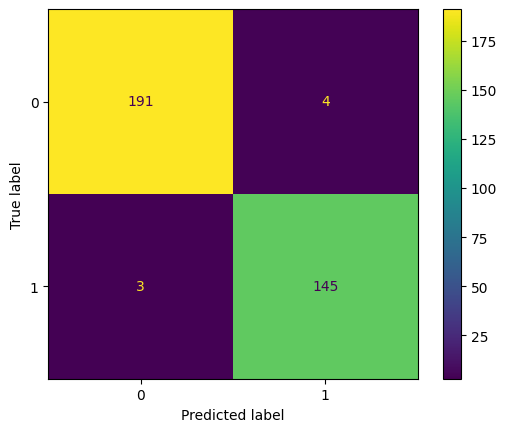

In [26]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



<BarContainer object of 4 artists>

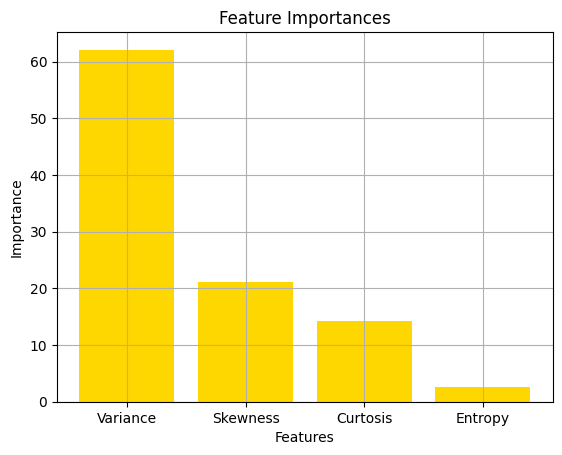

In [29]:
plt.title('Feature Importances')
plt.grid()
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns,tree.feature_importances_*100,color = 'gold')


In [30]:
tree.feature_importances_

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

In [31]:
from sklearn.tree import plot_tree

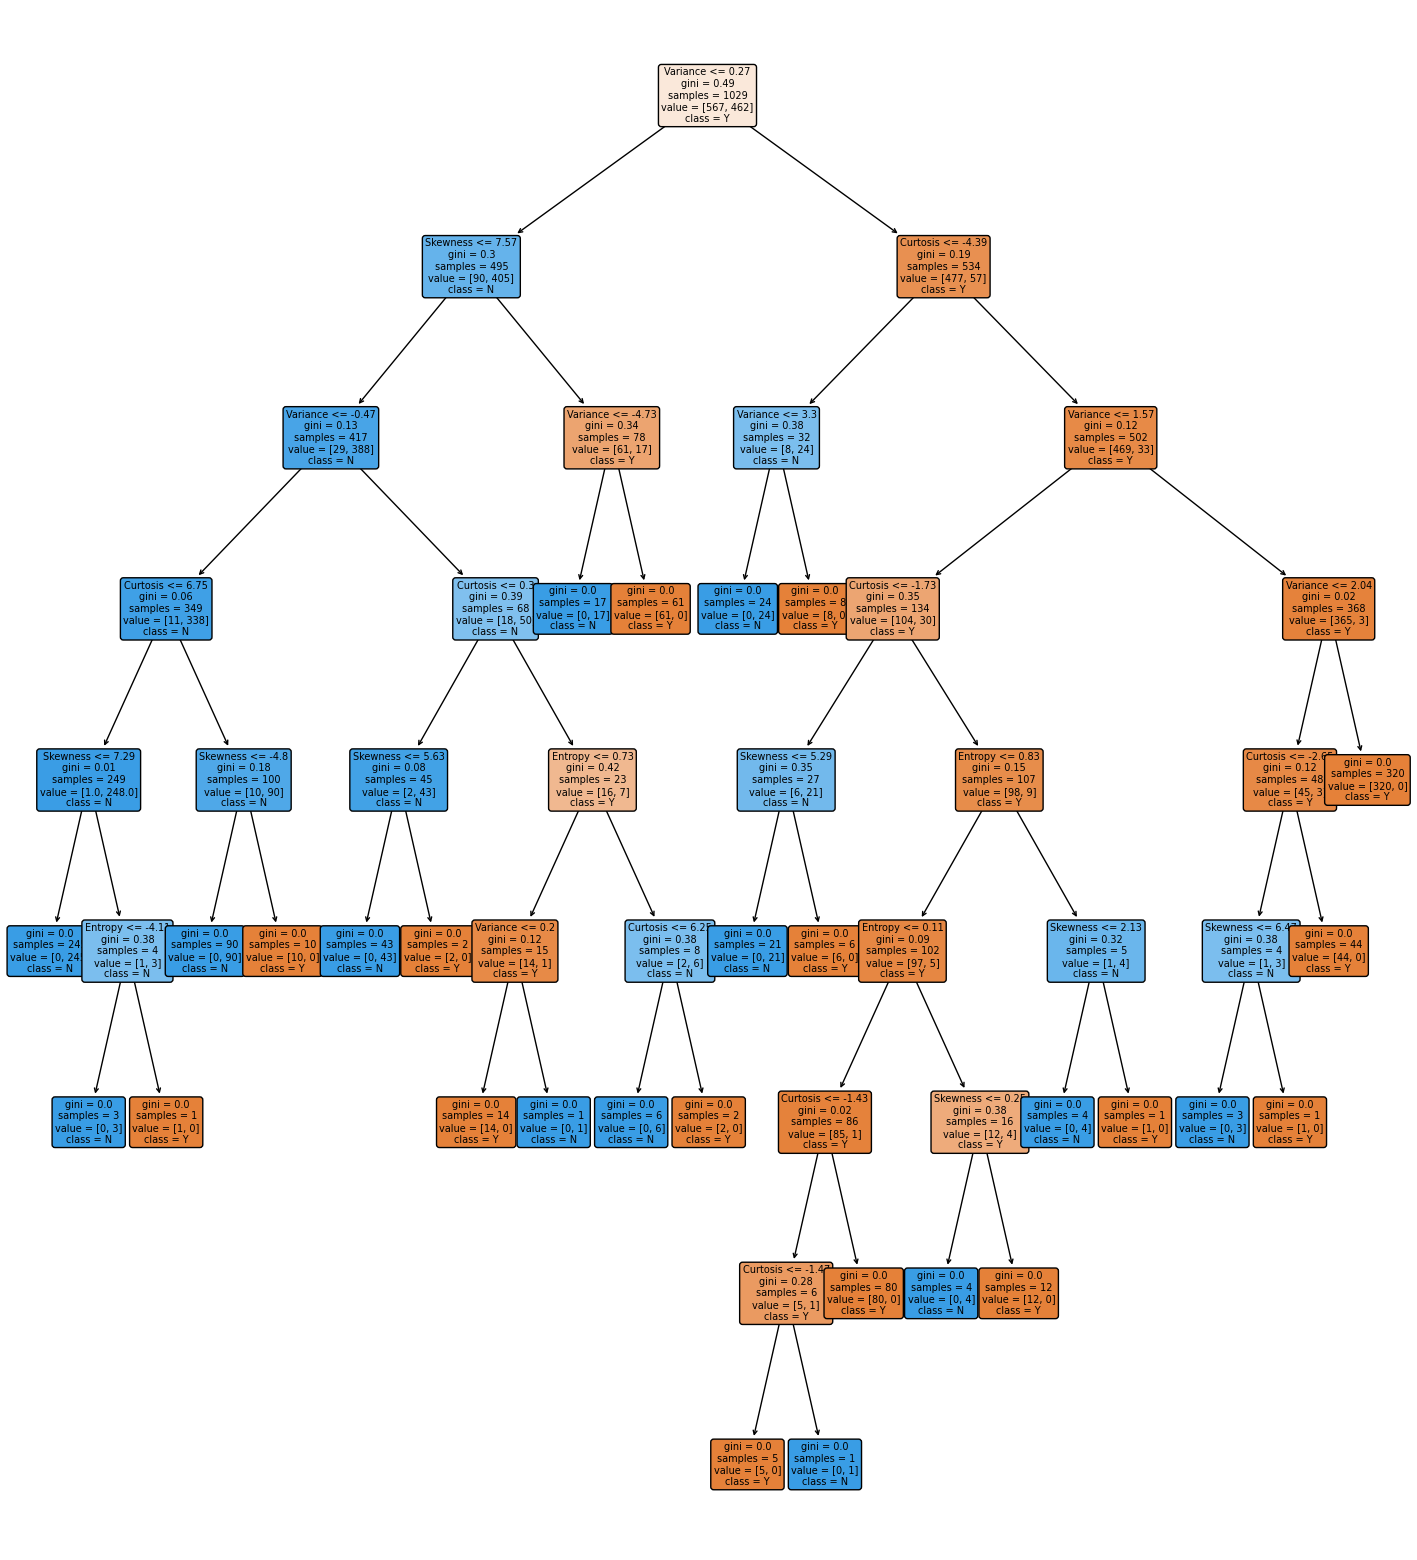

In [33]:
plt.figure(figsize = (18,20))
plot_tree(tree,fontsize = 7,filled = True,class_names = ['Y','N'],
         feature_names = ['Variance','Skewness','Curtosis','Entropy'],rounded = True,precision = 2);